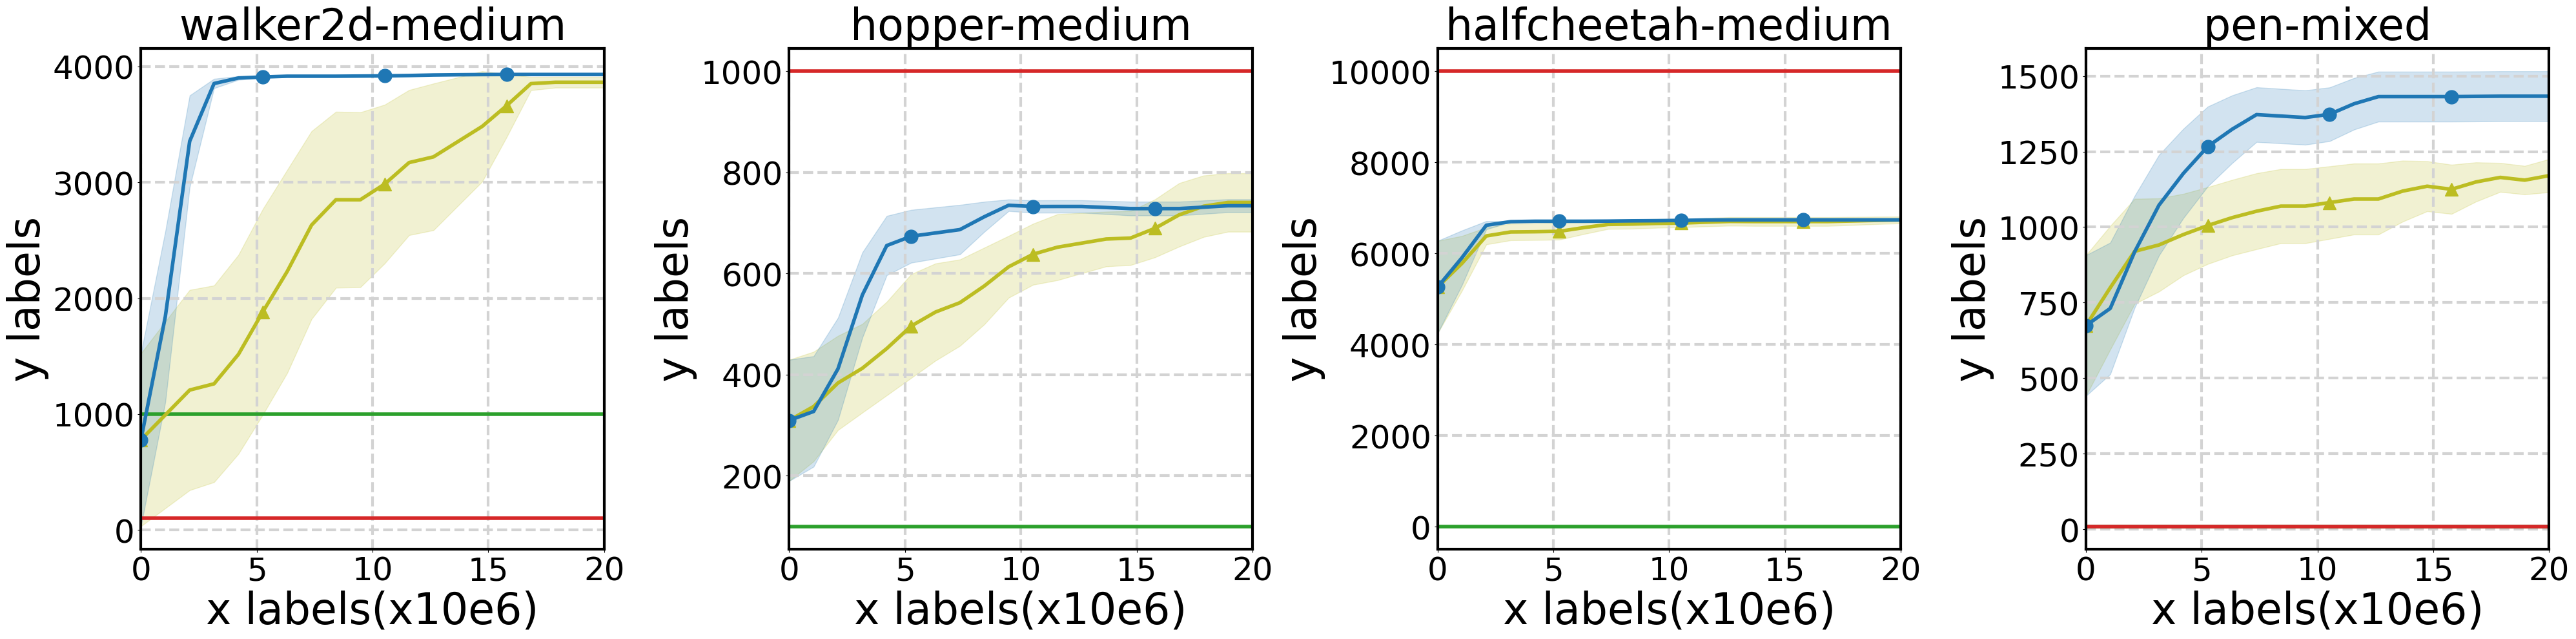

Plot saved to raw_data/sample_multi_figure.png


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
from matplotlib.ticker import MaxNLocator

env_limits = {
    'walker2d-medium': 20,
    'hopper-medium': 20,
    'halfcheetah-medium': 20,
    'pen-mixed': 20,
}
env_tiles = {
    'halfcheetah-medium': 'halfcheetah-medium',
    'pen-mixed': 'pen-mixed',
    'walker2d-medium': 'walker2d-medium',
    'hopper-medium': 'hopper-medium',
}

env_optima = {
    'walker2d-medium': 100,
    'hopper-medium': 1000,
    'halfcheetah-medium': 10000,
    'pen-mixed': 10,
}

env_optima2 = {
    'walker2d-medium': 1000,
    'hopper-medium': 100,
    'halfcheetah-medium': 10,
    'pen-mixed': 10,
}
data_dir = 'raw_data'

#OPE: Constant_baseline1
#Val: Constant_baseline2
#Baseline_Random_Selection: Baseline1
#BOMS_BOMS: Our_algo1

algorithms = ['OPE', 'Val', 'Baseline_Random_Selection', 'BOMS_BOMS']

metric_data = {}
opt_data = {}
files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

for env in env_limits.keys():
    for algo in algorithms:
        if algo in ['Val']:
            mean_data = np.ones(env_limits[env]) * env_optima[env]
            std_data = np.zeros_like(mean_data)
        elif algo in ['OPE']:
            mean_data = np.ones(env_limits[env]) * env_optima2[env]
            std_data = np.zeros_like(mean_data)
        else:
            matched_files = [f for f in files if f.startswith(f"{algo}_{env}.csv")] 
            for file_name in matched_files:
                file_path = os.path.join(data_dir, file_name)
                data = pd.read_csv(file_path, header=None).values
                data = data
                mean_data = np.mean(data[:env_limits[env]], axis=0)
                std_data = np.std(data[:env_limits[env]], axis=0)

                window_size = 2
                mean_data = uniform_filter1d(mean_data, size=window_size)
                std_data = uniform_filter1d(std_data, size=window_size)

        if env not in metric_data:
            metric_data[env] = {}

        metric_data[env][algo] = {
            'mean': mean_data,
            'std': std_data
        }


plt.rcParams.update({
    'axes.labelsize': 48,  
    'axes.titlesize': 48,  
    'xtick.labelsize': 36, 
    'ytick.labelsize': 36  
})

colors = ['#2CA02C', '#D62728', '#BCBD22','#1F77B4']
markers = ['', '', '^', 'o']
markersize = 15
markevery = 5
linewidth = 4
leg_font_size = 12

fig, axes = plt.subplots(1, 4, figsize=(40, 10))
axes = axes.flatten()

for idx, (env, algo_data) in enumerate(metric_data.items()):
    ax = axes[idx]
    ax.set_title(env_tiles[env])
    ax.set_xlabel('x labels(x10e6)')
    ax.set_ylabel('y labels')
    ax.grid(
        visible=True,
        which="major",
        color="lightgray",
        linestyle="--",
        linewidth=3,
    )
    time = np.linspace(0, env_limits[env], len(next(iter(algo_data.values()))['mean']))

    for algo_idx, (algo, stats) in enumerate(algo_data.items()):
        mean = stats['mean']
        std = stats['std']
        color = colors[algo_idx % len(colors)]
        marker = markers[algo_idx % len(markers)]
        ax.plot(time, mean, label=f'{algo}', marker=marker, color=color, markersize=markersize, markevery=markevery, linewidth=linewidth)
        ax.fill_between(time, mean - 0.5 * std, mean + 0.5 * std, color=color, alpha=0.2)
    ax.set_facecolor("white")
    ax.set_xlim(0, env_limits[env])

    for spine in ax.spines.values():
        spine.set_edgecolor("black")
        spine.set_linewidth(3)

output_path = os.path.join(data_dir, 'sample_multi_figure.png')

plt.tight_layout()
plt.savefig(output_path, format='png', bbox_inches='tight', pad_inches=0.3)
plt.show()
print(f"Plot saved to {output_path}")




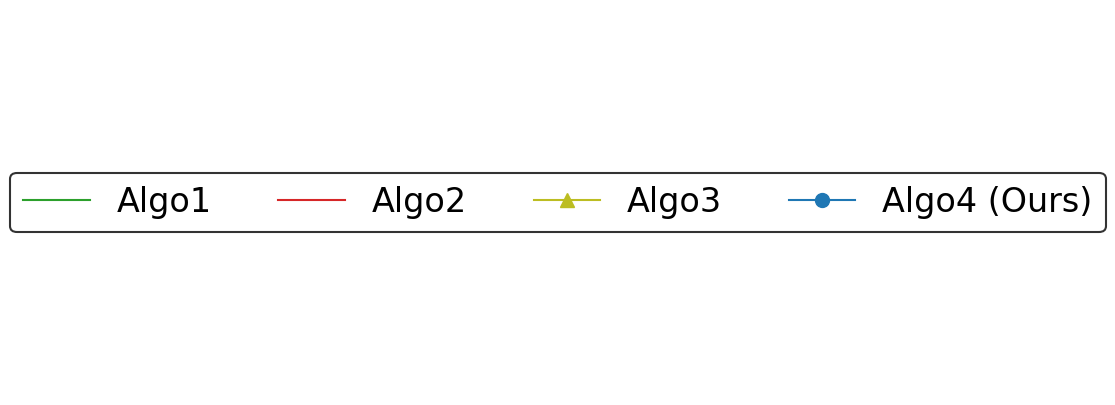

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
from matplotlib.ticker import MaxNLocator

colors = ['#2CA02C', '#D62728', '#BCBD22','#1F77B4']
markers = ['', '', '^', 'o']
leg_font_size = 24
markersize = 10
algorithms = ['Algo1', 'Algo2', 'Algo3', 'Algo4 (Ours)']
fig, ax = plt.subplots(figsize=(10, 5))
for algo_idx, algo in enumerate(algorithms):
    ax.plot([], [], label=f'{algo}', marker=markers[algo_idx], color=colors[algo_idx], markersize=markersize)
ax.set_facecolor("white")
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.rcParams.update({'legend.fontsize': leg_font_size,})
legend = ax.legend(loc='center', ncol=4)

frame = legend.get_frame()
frame.set_edgecolor("black")
frame.set_facecolor("white")
frame.set_linewidth(1.5)
plt.savefig('sample_multi_figure_legend.png', format='png', bbox_inches='tight', pad_inches=0.3)
plt.show()


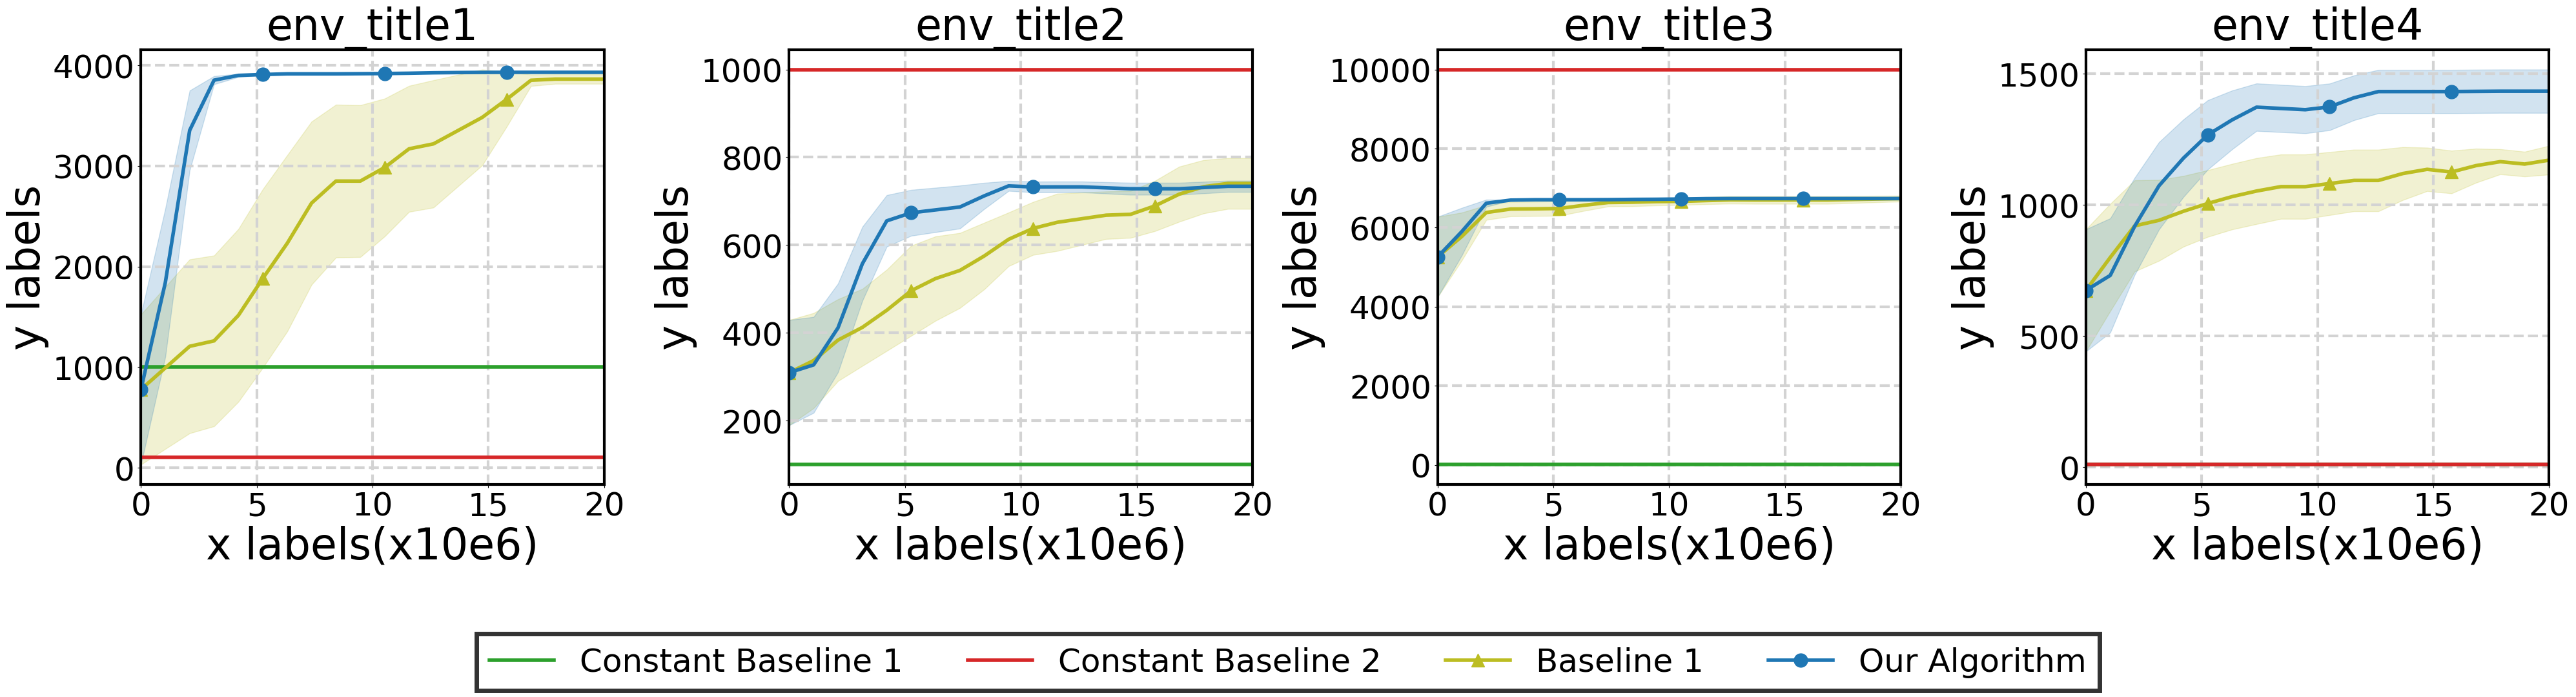

Plot saved to raw_data/sample_multi_figure_with_legend.png


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

env_limits = {
    'walker2d-medium': 20,
    'hopper-medium': 20,
    'halfcheetah-medium': 20,
    'pen-mixed': 20,
}
env_tiles = {
    'walker2d-medium': 'env_title1',
    'hopper-medium': 'env_title2',
    'halfcheetah-medium': 'env_title3',
    'pen-mixed': 'env_title4',
}
env_optima = {
    'walker2d-medium': 100,
    'hopper-medium': 1000,
    'halfcheetah-medium': 10000,
    'pen-mixed': 10,
}
env_optima2 = {
    'walker2d-medium': 1000,
    'hopper-medium': 100,
    'halfcheetah-medium': 10,
    'pen-mixed': 10,
}
data_dir = 'raw_data'

algo_labels = {
    'OPE': 'Constant Baseline 1',
    'Val': 'Constant Baseline 2',
    'Baseline_Random_Selection': 'Baseline 1',
    'BOMS_BOMS': 'Our Algorithm'
}

algorithms = ['OPE', 'Val', 'Baseline_Random_Selection', 'BOMS_BOMS']

metric_data = {}
files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

for env in env_limits.keys():
    for algo in algorithms:
        if algo in ['Val']:
            mean_data = np.ones(env_limits[env]) * env_optima[env]
            std_data = np.zeros_like(mean_data)
        elif algo in ['OPE']:
            mean_data = np.ones(env_limits[env]) * env_optima2[env]
            std_data = np.zeros_like(mean_data)
        else:
            matched_files = [f for f in files if f.startswith(f"{algo}_{env}.csv")] 
            for file_name in matched_files:
                file_path = os.path.join(data_dir, file_name)
                data = pd.read_csv(file_path, header=None).values
                mean_data = np.mean(data[:env_limits[env]], axis=0)
                std_data = np.std(data[:env_limits[env]], axis=0)

                window_size = 2
                mean_data = uniform_filter1d(mean_data, size=window_size)
                std_data = uniform_filter1d(std_data, size=window_size)

        if env not in metric_data:
            metric_data[env] = {}

        metric_data[env][algo] = {'mean': mean_data, 'std': std_data}

plt.rcParams.update({
    'axes.labelsize': 48,  
    'axes.titlesize': 48,  
    'xtick.labelsize': 36, 
    'ytick.labelsize': 36  
})
colors = ['#2CA02C', '#D62728', '#BCBD22', '#1F77B4']
markers = ['', '', '^', 'o']
markersize = 15
markevery = 5
linewidth = 4
leg_font_size = 36
fig, axes = plt.subplots(1, 4, figsize=(40, 10))
axes = axes.flatten()

handles, labels = [], []

for idx, (env, algo_data) in enumerate(metric_data.items()):
    ax = axes[idx]
    ax.set_title(env_tiles[env])
    ax.set_xlabel('x labels(x10e6)')
    ax.set_ylabel('y labels')
    ax.grid(visible=True, which="major", color="lightgray", linestyle="--", linewidth=3)

    time = np.linspace(0, env_limits[env], len(next(iter(algo_data.values()))['mean']))

    for algo_idx, (algo, stats) in enumerate(algo_data.items()):
        mean = stats['mean']
        std = stats['std']
        color = colors[algo_idx % len(colors)]
        marker = markers[algo_idx % len(markers)]
        
        line, = ax.plot(time, mean, label=algo_labels.get(algo, algo), marker=marker,
                        color=color, markersize=markersize, markevery=markevery, linewidth=linewidth)
        ax.fill_between(time, mean - 0.5 * std, mean + 0.5 * std, color=color, alpha=0.2)

        if idx == 0:
            handles.append(line)
            labels.append(algo_labels.get(algo, algo))

    ax.set_facecolor("white")
    ax.set_xlim(0, env_limits[env])

    for spine in ax.spines.values():
        spine.set_edgecolor("black")
        spine.set_linewidth(3)

leg = fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), 
                 ncol=len(algorithms), fontsize=leg_font_size, frameon=True, edgecolor="black", fancybox=False)
leg.get_frame().set_linewidth(5)

plt.tight_layout(rect=[0, 0.1, 1, 1])

output_path = os.path.join(data_dir, 'sample_multi_figure_with_legend.png')
plt.savefig(output_path, format='png', bbox_inches='tight', pad_inches=0.3)
plt.show()

print(f"Plot saved to {output_path}")


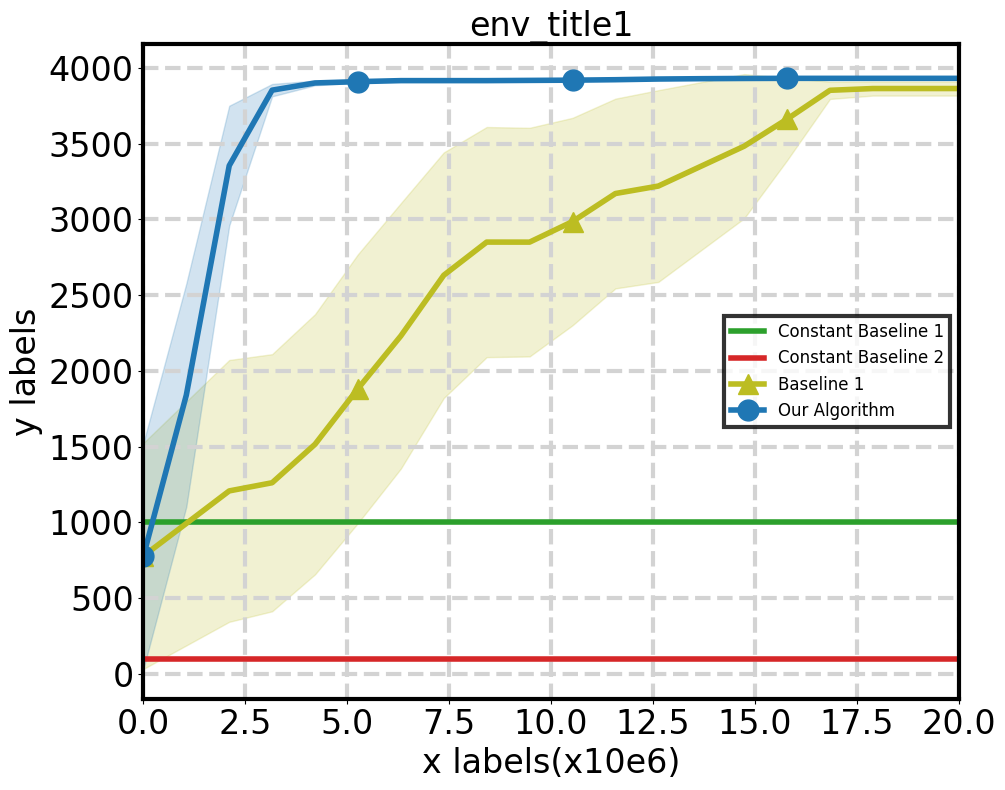

Plot saved to raw_data/sample_one_figure.png


In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

env_limits = {'walker2d-medium': 20}
env_tiles = {'walker2d-medium': 'env_title1'}
env_optima = {'walker2d-medium': 100}
env_optima2 = {'walker2d-medium': 1000}

data_dir = 'raw_data'
algorithms = ['OPE', 'Val', 'Baseline_Random_Selection', 'BOMS_BOMS']
algo_labels = {
    'OPE': 'Constant Baseline 1',
    'Val': 'Constant Baseline 2',
    'Baseline_Random_Selection': 'Baseline 1',
    'BOMS_BOMS': 'Our Algorithm'
}


metric_data = {}
files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

env = 'walker2d-medium'
metric_data[env] = {}

for algo in algorithms:
    if algo in ['Val']:
        mean_data = np.ones(env_limits[env]) * env_optima[env]
        std_data = np.zeros_like(mean_data)
    elif algo in ['OPE']:
        mean_data = np.ones(env_limits[env]) * env_optima2[env]
        std_data = np.zeros_like(mean_data)
    else:
        matched_files = [f for f in files if f.startswith(f"{algo}_{env}.csv")]
        for file_name in matched_files:
            file_path = os.path.join(data_dir, file_name)
            data = pd.read_csv(file_path, header=None).values
            mean_data = np.mean(data[:env_limits[env]], axis=0)
            std_data = np.std(data[:env_limits[env]], axis=0)

            window_size = 2
            mean_data = uniform_filter1d(mean_data, size=window_size)
            std_data = uniform_filter1d(std_data, size=window_size)

    metric_data[env][algo] = {'mean': mean_data, 'std': std_data}

plt.rcParams.update({
    'axes.labelsize': 24,
    'axes.titlesize': 24,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24
})
colors = ['#2CA02C', '#D62728', '#BCBD22', '#1F77B4']
markers = ['', '', '^', 'o']
markersize = 15
markevery = 5
linewidth = 4
leg_font_size = 12
fig, ax = plt.subplots(figsize=(10, 8))
handles, labels = [], []

ax.set_title(env_tiles[env])
ax.set_xlabel('x labels(x10e6)')
ax.set_ylabel('y labels')
ax.grid(visible=True, which="major", color="lightgray", linestyle="--", linewidth=3)

time = np.linspace(0, env_limits[env], len(next(iter(metric_data[env].values()))['mean']))

for algo_idx, (algo, stats) in enumerate(metric_data[env].items()):
    mean = stats['mean']
    std = stats['std']
    color = colors[algo_idx % len(colors)]
    marker = markers[algo_idx % len(markers)]

    line, = ax.plot(time, mean, label=algo_labels.get(algo, algo), marker=marker,
                    color=color, markersize=markersize, markevery=markevery, linewidth=linewidth)
    ax.fill_between(time, mean - 0.5 * std, mean + 0.5 * std, color=color, alpha=0.2)

    handles.append(line)
    labels.append(algo_labels.get(algo, algo))

ax.set_facecolor("white")
ax.set_xlim(0, env_limits[env])

for spine in ax.spines.values():
    spine.set_edgecolor("black")
    spine.set_linewidth(3)

leg = ax.legend(handles, labels, loc='best', fontsize=leg_font_size, frameon=True, edgecolor="black", fancybox=False)
leg.get_frame().set_linewidth(3)

plt.tight_layout()

output_path = os.path.join(data_dir, 'sample_one_figure.png')
plt.savefig(output_path, format='png', bbox_inches='tight', pad_inches=0.3)
plt.show()

print(f"Plot saved to {output_path}")
